# Importing Libraries



In [128]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


In [129]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/ start/7004OTT Content Reviews - 7004OTT Content Reviews.csv', encoding='UTF-8')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


In [130]:
data.drop_duplicates(inplace=True)
data



,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


In [131]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Label ==1]),
      "\nTotal Negative Reviews:",len(data[data.Label==2]),
      "\nTotal Neutral Reviews:",len(data[data.Label ==0]))

Total Reviews: 6618 
Total Positive Reviews: 3409 
Total Negative Reviews: 2171 
Total Neutral Reviews: 1038


In [132]:
# Checking for missing values

data.isnull().values.any()

False

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



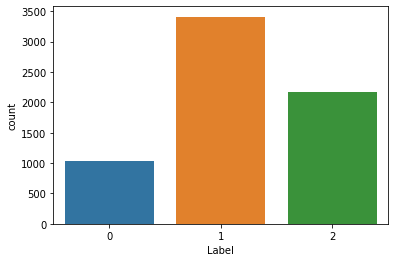

In [133]:
sns.countplot(data['Label'])

In [134]:
data.drop_duplicates(inplace=True)
data

,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


**Some unprocessed reviews**

In [135]:
# print some unprocessed reviews
sample_data = [5,110,169,208,209,307,123,221,229]
for i in sample_data:
      print(data.Text[i],'\n','Sentiment:-- ',data.Label[i],'\n')

এই গল্পে প্রচুর থ্রিল থাকবে কি হবে কি হবে এটা বুঝতেই পারবে না কেউ।।আগুন একটা কাজ হবে এই সিন্ডিকেট এ️️love u guru 
 Sentiment:--  1 

শেষের মুহূর্তটা পূর্ণ জন্ম মত 
 Sentiment:--  1 

মনে হচ্ছে একটা মাস্টারপিস মাস্ট ওয়াচ হতে যাচ্ছে... 
 Sentiment:--  1 

পাট ২ জন্য পাগল হয়ে গেছি 
 Sentiment:--  1 

ভাই ভালোর জন্য বলছি নিজের চ্যানেল টা যদি টিকিয়ে রাখতে চান তাহলে ভিডিও টা ডিলেট করে দিন 
 Sentiment:--  0 

কম বেশি সব ভালো ভালো অভিনয় শিল্পী। অবশ্যই দেখবো। সকল টিম মেম্বারদের জন্য শুভকামনা রইল। 
 Sentiment:--  1 

সত্যিই প্রচন্ড বিরক্তিকর ছিল শেষটা এমন এক জায়গায়ে শেষ কিন্তু, অসাধারণ ছিলো বলতে হবে আর আমি অপেক্ষা আছি পার্ট 2 এর জন্য 
 Sentiment:--  1 

বাংলাদেশের ছবিতে গুলো অসাধারণ। প্রশংসা করার ভাষা থেকে না এতটাই সুন্দর হয়। এরকম আরো অনেক ভালো ভালো ছবিতে উপহার পেলে খুব খুশি হব। 
 Sentiment:--  1 

তাকদীর এর পর আবার একটা ভালো thriller। ভালোবাসা নেবেন কলকাতা থেকে। 
 Sentiment:--  1 



**Data Cleaning**

In [136]:
!pip install bnlp_toolkit
!pip install bangla-stemmer
#importing stemmer
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from bangla_stemmer.stemmer import stemmer
import re
btokenizer = BasicTokenizer()

def clean_text(text):
    text = re.sub('[^\u0980-\u09FF]',' ',str(text))
    tokens = btokenizer.tokenize(text)
    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(tokens)
    filtered = []
    for i in stm:
      
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
       
        filtered.append(i)
    
    return " ".join(filtered)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Apply The Function in to the Dataframe**

In [137]:
# Apply the function into the dataframe
data['cleaned'] = data['Text'].apply(clean_text)  

# print some cleaned reviews from the dataset
sample_data = [120,220,330,456,548,779,879,99,1001,2005]
for i in sample_data:
     print('Original:\n',data.Text[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Label[i],'\n')

Streaming output truncated to the last 5000 lines.
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
app

**Remove Low length data**

In [138]:
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))

# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = data.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 6618


In [139]:
dataset=dataset[['cleaned','Label']]
dataset.head()

,cleaned,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ওন কান্না আস,1
2,পুরা আগুন অপেক্ষায় আছি টা দেখ,1
3,ইন্টারেস্টিং স্টোরি অভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল ১০০ টাকা মুভির ট্রেইল থেক ...,1


 **Summary of the reviews and words distribution in the dataset**

In [140]:
#Dataset Summary

def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip() for t in list(dataset[dataset.Label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        
        # Documents per class
        documents.append(len(list(dataset[dataset.Label==label].cleaned)))
        
        # Total Word per class
        words.append(len(word_list))
        
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
                
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  1
Number of Documents:3409
Number of Words:26770
Number of Unique Words:5175
Most Frequent Words:

গান	732
ভালো	648
এক	593
অসাধারণ	527
সুন্দর	372
কর	333
অভিনয়	299
নাটক	284
আম	283
টা	271

Class Name :  2
Number of Documents:2171
Number of Words:18379
Number of Unique Words:5315
Most Frequent Words:

কর	397
ভালো	253
এক	243
নাটক	161
দাখ	127
দেখ	127
এসব	123
সিরিজ	122
আম	119
থেক	119

Class Name :  0
Number of Documents:1038
Number of Words:6340
Number of Unique Words:2255
Most Frequent Words:

কর	118
টা	91
দেখ	89
মুভি	83
আম	71
ভাই	68
এক	66
থেক	55
নাটক	54
চাই	54
Total Number of Unique Words:9377


**Dataset Summary Visualization**

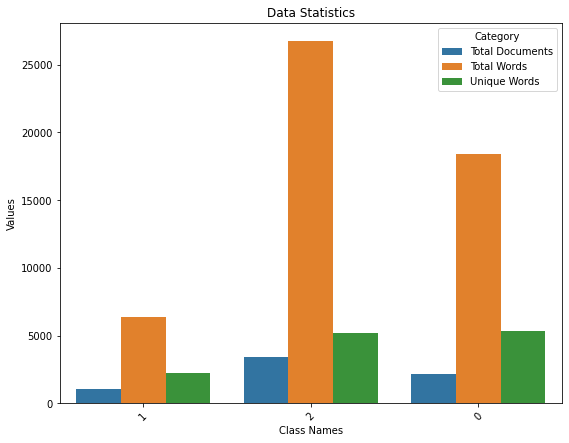

In [141]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(9,7))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

**Text Length Distribution**

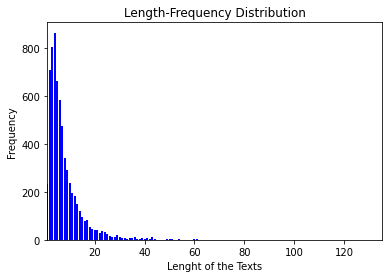

Maximum Length of a review: 156
Minimum Length of a review: 0
Average Length of a reviews: 8.0


In [142]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

**Tokenize**

In [143]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 9377
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 156
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data['cleaned'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9377 unique tokens.


In [144]:
X = tokenizer.texts_to_sequences(data['cleaned'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (6618, 156)


In [145]:

Y = pd.get_dummies(data['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (6618, 3)


In [146]:
X

array([[   0,    0,    0, ...,  292, 1324,  594],
       [   0,    0,    0, ...,  780,  451,   98],
       [   0,    0,    0, ...,  127,    9,    7],
       ...,
       [   0,    0,    0, ...,   44,  180,  224],
       [   0,    0,    0, ...,  893,   18,   67],
       [   0,    0,    0, ...,    0,  109,   74]], dtype=int32)

**Splitting**

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 69)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
     

(5294, 156) (5294, 3)
(1324, 156) (1324, 3)


**Model build LSTM**

In [148]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 156, 100)          937700    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 156, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 128)               117248    
                                                                 
 dense_14 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,055,335
Trainable params: 1,055,335
Non-trainable params: 0
_________________________________________________________________
None


**Train model**

In [149]:
epochs = 10
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
     

Epoch 1/10
75/75 [==============================] - 53s 673ms/step - loss: 0.9713 - accuracy: 0.5309 - val_loss: 0.8174 - val_accuracy: 0.6189
Epoch 2/10
75/75 [==============================] - 36s 482ms/step - loss: 0.6634 - accuracy: 0.7340 - val_loss: 0.6240 - val_accuracy: 0.7340
Epoch 3/10
75/75 [==============================] - 36s 480ms/step - loss: 0.4456 - accuracy: 0.8344 - val_loss: 0.5603 - val_accuracy: 0.7604
Epoch 4/10
75/75 [==============================] - 38s 510ms/step - loss: 0.3074 - accuracy: 0.8902 - val_loss: 0.6124 - val_accuracy: 0.7642
Epoch 5/10
75/75 [==============================] - 36s 483ms/step - loss: 0.2307 - accuracy: 0.9200 - val_loss: 0.6515 - val_accuracy: 0.7679
Epoch 6/10
75/75 [==============================] - 36s 480ms/step - loss: 0.1877 - accuracy: 0.9366 - val_loss: 0.6539 - val_accuracy: 0.7717


**Accuracy score**

In [150]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

42/42 [==============================] - 2s 49ms/step - loss: 0.7226 - accuracy: 0.7485
Test set
  Loss: 0.723
  Accuracy: 0.748


**Accuracy graph**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])


In [152]:
from sklearn import metrics
preds = np.round(model.predict((X_test)),0)
print("rounded test_labels",preds)

42/42 [==============================] - 2s 49ms/step
rounded test_labels [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


**Performance matrix LSTM**

In [153]:
test_labels = np.array((Y_test))
experiment_labels = ["0","1","2" ]
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.69      0.46      0.55       215
           1       0.84      0.81      0.83       703
           2       0.70      0.72      0.71       406

   micro avg       0.78      0.73      0.75      1324
   macro avg       0.74      0.66      0.70      1324
weighted avg       0.77      0.73      0.75      1324
 samples avg       0.73      0.73      0.73      1324



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [154]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a=precision_score(Y_test, preds,average='micro')
b=recall_score(Y_test, preds,average='micro')
c=f1_score(Y_test, preds,average='micro')
print("Precision_score",a)
print("Recall_score",b)
print("F1_score",c)

Precision_score 0.7760711398544866
Recall_score 0.7250755287009063
F1_score 0.7497071456462319


**Confusion matrix for lstm**

42/42 [==============================] - 2s 51ms/step


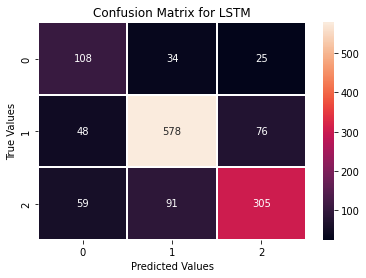

In [155]:
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(6, 4))

pred = model.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(Y_test, 1)

mat = confusion_matrix(test,pred)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')
plt.title("Confusion Matrix for LSTM")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

**Model performance charts**

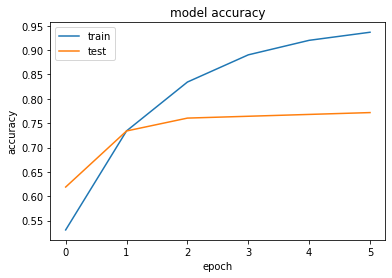

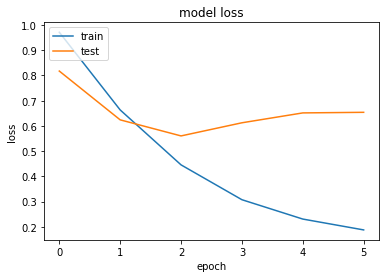

In [156]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

**Experiment output**

In [157]:
new_complaint = ['নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['0','1','2' ]
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 51ms/step
[[0.02040835 0.93024033 0.04935131]] 1


**Model build CNN**

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Conv1D

In [159]:
# Neural Network architecture

cnn_model = Sequential()
embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1], trainable=False)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(100, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(3, activation='softmax'))

In [160]:
# Model compiling
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn_model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 156, 100)          937700    
                                                                 
 conv1d_6 (Conv1D)           (None, 152, 100)          50100     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 3)                 303       
                                                                 
Total params: 988,103
Trainable params: 50,403
Non-trainable params: 937,700
_________________________________________________________________
None


**Train model**

In [161]:
# Model training
cnn_model_history = cnn_model.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1, validation_split=0.4,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/30
50/50 [==============================] - 4s 73ms/step - loss: 0.9983 - accuracy: 0.5202 - val_loss: 0.9927 - val_accuracy: 0.4967
Epoch 2/30
50/50 [==============================] - 3s 69ms/step - loss: 0.9535 - accuracy: 0.5208 - val_loss: 0.9646 - val_accuracy: 0.5071
Epoch 3/30
50/50 [==============================] - 3s 69ms/step - loss: 0.9133 - accuracy: 0.5450 - val_loss: 0.9292 - val_accuracy: 0.5279
Epoch 4/30
50/50 [==============================] - 3s 69ms/step - loss: 0.8632 - accuracy: 0.6190 - val_loss: 0.8896 - val_accuracy: 0.5836
Epoch 5/30
50/50 [==============================] - 3s 69ms/step - loss: 0.8113 - accuracy: 0.6662 - val_loss: 0.8670 - val_accuracy: 0.5817
Epoch 6/30
50/50 [==============================] - 4s 70ms/step - loss: 0.7622 - accuracy: 0.6927 - val_loss: 0.8371 - val_accuracy: 0.6161
Epoch 7/30
50/50 [==============================] - 3s 70ms/step - loss: 0.7192 - accuracy: 0.7116 - val_loss: 0.8242 - val_accuracy: 0.6242
Epoch 8/30
50

**Accuracy score**

In [179]:
accr = cnn_model.evaluate(X_test,Y_test,verbose=1)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

42/42 [==============================] - 1s 12ms/step - loss: 0.7827 - accuracy: 0.6533
Test set
  Loss: 0.783
  Accuracy: 0.653


**Accuracy graph**

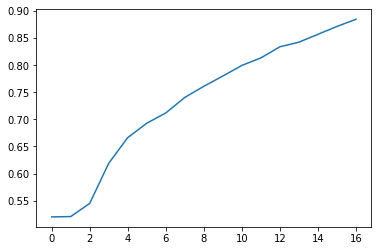

In [180]:
import matplotlib.pyplot as plt
plt.plot(cnn_model_history.history['accuracy'])


**Performance matrix**

In [181]:
test_labels = np.array((Y_test))
experiment_labels = ["0","1","2" ]
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.69      0.46      0.55       215
           1       0.84      0.81      0.83       703
           2       0.70      0.72      0.71       406

   micro avg       0.78      0.73      0.75      1324
   macro avg       0.74      0.66      0.70      1324
weighted avg       0.77      0.73      0.75      1324
 samples avg       0.73      0.73      0.73      1324



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [182]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a1=precision_score(Y_test, preds,average='micro')
b1=recall_score(Y_test, preds,average='micro')
c1=f1_score(Y_test, preds,average='micro')
print("Precision_score",a1)
print("Recall_score",b1)
print("F1_score",c1)

Precision_score 0.7760711398544866
Recall_score 0.7250755287009063
F1_score 0.7497071456462319


**Confusion matrix**

42/42 [==============================] - 0s 11ms/step


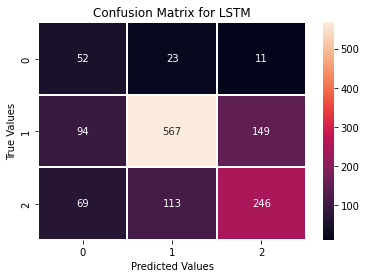

In [183]:
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(6, 4))

pred = cnn_model.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(Y_test, 1)

mat = confusion_matrix(test,pred)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')
plt.title("Confusion Matrix for LSTM")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

**Model performance charts**

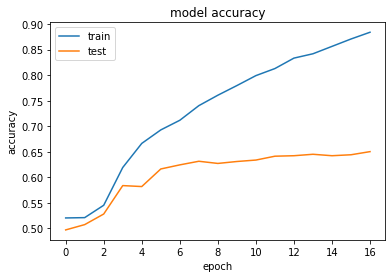

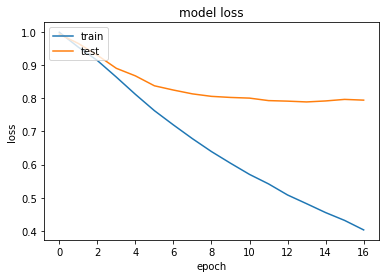

In [184]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

**Experiment output**

In [185]:
new_complaint = ['নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = cnn_model.predict(padded)
labels = ['0','1','2' ]
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 23ms/step
[[0.3767335 0.2968474 0.3264191]] 0


**Hybrid (CNN-LSTM)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD,Adam
from keras import regularizers

In [ ]:
hybrid_model= Sequential()
hybrid_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
hybrid_model.add(Conv1D(200, kernel_size=3, activation = "relu"))
hybrid_model.add(LSTM(64, return_sequences=True))
hybrid_model.add(Dropout(0.2))
hybrid_model.add(LSTM(64))
hybrid_model.add(Dense(50, activation='relu'))
hybrid_model.add(Dense(50, activation='relu'))
hybrid_model.add(Flatten())
#l2 regularizer
hybrid_model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
hybrid_model.add(Dense(3, activation='softmax'))
#sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
hybrid_model.summary()
hybrid_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

**Model train**

In [171]:
history_hybrid=hybrid_model.fit(X_train,Y_train,epochs=5,batch_size=256,validation_data=(X_test,Y_test))

Epoch 1/5
21/21 [==============================] - 31s 1s/step - loss: 1.6837 - accuracy: 0.4934 - val_loss: 1.5646 - val_accuracy: 0.5310
Epoch 2/5
21/21 [==============================] - 26s 1s/step - loss: 1.5297 - accuracy: 0.5111 - val_loss: 1.4811 - val_accuracy: 0.5310
Epoch 3/5
21/21 [==============================] - 26s 1s/step - loss: 1.4456 - accuracy: 0.5111 - val_loss: 1.4028 - val_accuracy: 0.5310
Epoch 4/5
21/21 [==============================] - 26s 1s/step - loss: 1.3587 - accuracy: 0.5406 - val_loss: 1.2963 - val_accuracy: 0.5763
Epoch 5/5
21/21 [==============================] - 26s 1s/step - loss: 1.0808 - accuracy: 0.7125 - val_loss: 1.0928 - val_accuracy: 0.6903


**Accuracy score**

In [172]:
accr =hybrid_model.evaluate(X_test,Y_test,verbose=1)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

42/42 [==============================] - 3s 66ms/step - loss: 1.0928 - accuracy: 0.6903
Test set
  Loss: 1.093
  Accuracy: 0.690


**Accuracy graph**

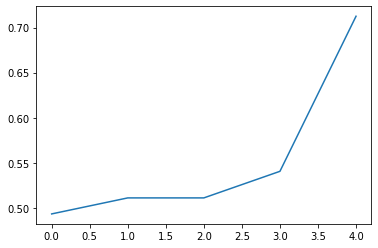

In [173]:
import matplotlib.pyplot as plt
plt.plot(history_hybrid.history['accuracy'])


**Performance matrix**

In [174]:
test_labels = np.array((Y_test))
experiment_labels = ["0","1","2" ]
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.69      0.46      0.55       215
           1       0.84      0.81      0.83       703
           2       0.70      0.72      0.71       406

   micro avg       0.78      0.73      0.75      1324
   macro avg       0.74      0.66      0.70      1324
weighted avg       0.77      0.73      0.75      1324
 samples avg       0.73      0.73      0.73      1324



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [175]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a2=precision_score(Y_test, preds,average='micro')
b2=recall_score(Y_test, preds,average='micro')
c2=f1_score(Y_test, preds,average='micro')
print("Precision_score",a2)
print("Recall_score",b2)
print("F1_score",c2)

Precision_score 0.7760711398544866
Recall_score 0.7250755287009063
F1_score 0.7497071456462319


**Confusion matrix**

42/42 [==============================] - 4s 65ms/step


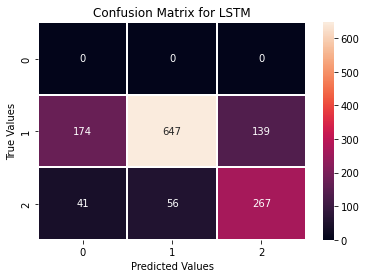

In [176]:
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(6, 4))

pred = hybrid_model.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(Y_test, 1)

mat = confusion_matrix(test,pred)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')
plt.title("Confusion Matrix for LSTM")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


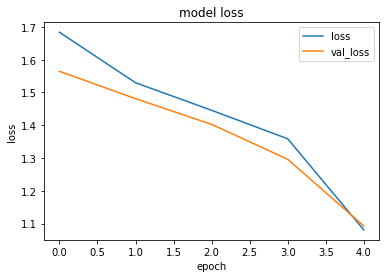

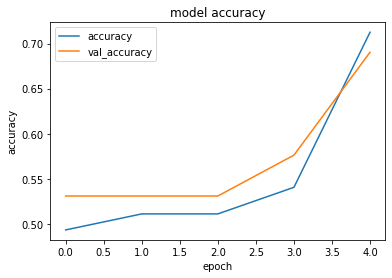

In [177]:
print(history_hybrid.history.keys())
loss = history_hybrid.history['loss']
val_loss = history_hybrid.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history_hybrid.history['accuracy']
val_accuracy= history_hybrid.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

**Experiment output**

In [178]:
new_complaint = ['নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred =hybrid_model.predict(padded)
labels = ['0','1','2' ]
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 29ms/step
[[0.11933074 0.8470878  0.03358142]] 1
